In [85]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx

In [86]:
df = gpd.read_file('data/points_for_map.geojson')

In [87]:
nombres= df.nombre.unique()

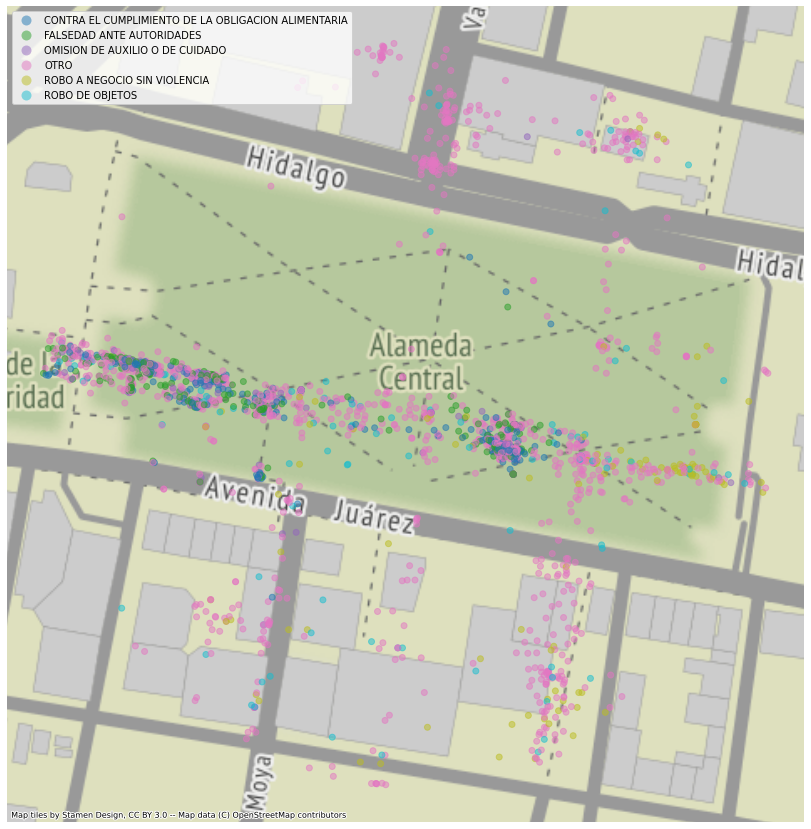

In [88]:
nombres= ["lynyi"]
for place in nombres:
    df_place= df.query(f'nombre == "{place}"')
    df_place.crs = 'epsg:4623'
    df_place = df_place.to_crs(epsg=3857)
    top_delitos = df_place.delito.value_counts().head(5).index
    mapa_top =dict([(d, d) for d in top_delitos])
    df_place= df_place.assign(delito = lambda x:x.delito.map(mapa_top).fillna('OTRO'))
    ax = df_place.plot('delito', figsize=(15, 15), alpha=0.5, legend= True)
    try:
        cx.add_basemap(ax, zoom=17)
    except:
        try: 
            cx.add_basemap(ax, zoom=16)
        except:
            #print('fail')
            try:
                cx.add_basemap(ax, zoom=15)
            except:
                try:
                    cx.add_basemap(ax, zoom=14)
                except:
                    pass
    #            
    plt.axis('off')
    plt.savefig(f'data/figures/{place}/map.png')